In [1]:
# classValue = [-1, 0, 1, 2, 3, 4, 5]
# classNames = ['No change', 'Built Up', 'Agricultural land', 'Wastelands', 'Water bodies', 'Wetlands', 'Forest']
# classColor = ['black', 'red', 'yellow', 'light-pink', 'blue', 'ice-blue', 'green']
# classColor_dict = dict(zip(classValue, classColor))
# classColor_dict

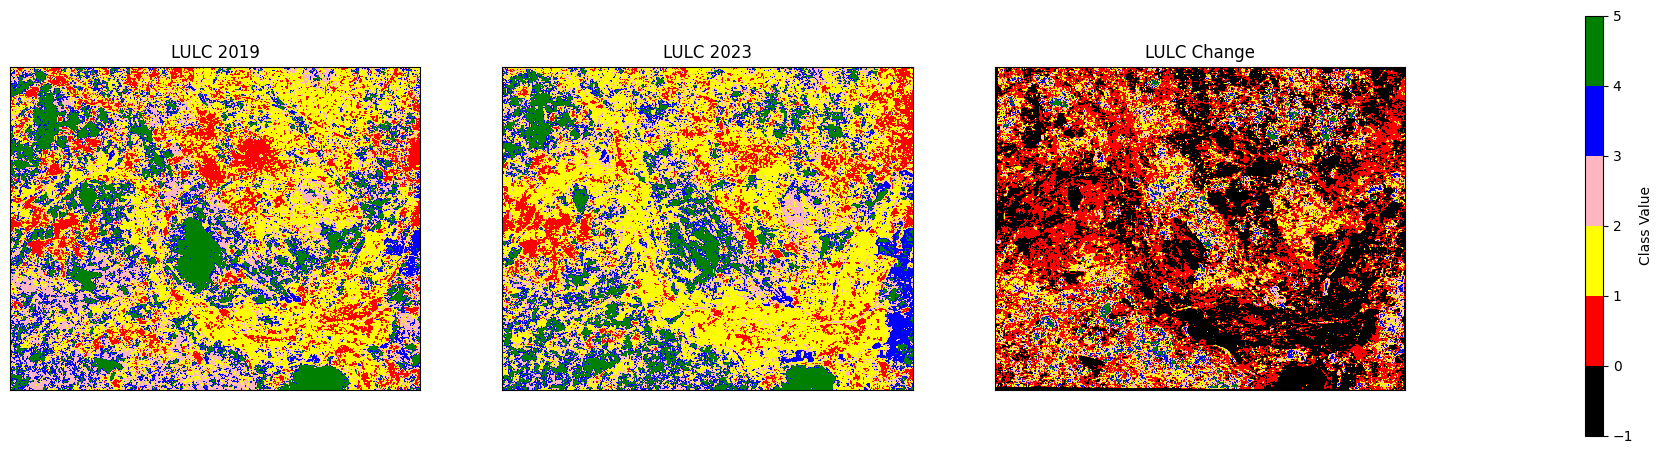

In [1]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# File paths
file_paths = [
    'D:\\Akshaya\\LULC_dataset\\jupyterNB_outputs\\03_CNN2019\\lulc_2019.tif',
    'D:\\Akshaya\\LULC_dataset\\jupyterNB_outputs\\04_CNN2023new\\lulc_2023.tif',
    'D:\\Akshaya\\LULC_dataset\\jupyterNB_outputs\\06_LULC_change\\LULC_change.tif'
]

# Define the custom color palette with hex codes
color_dict = {
    -1: '#000000',  # black
    0: '#FF0000',   # red
    1: '#FFFF00',   # yellow
    2: '#FFB6C1',   # light-pink
    3: '#0000FF',   # blue
    4: '#E0FFFF',   # ice-blue
    5: '#008000'    # green
}

# Create a custom colormap from the dictionary
def create_colormap(color_dict):
    cmap = mcolors.ListedColormap([color_dict[key] for key in sorted(color_dict.keys())])
    bounds = sorted(color_dict.keys())
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    return cmap, norm

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        transform = src.transform
        crs = src.crs
    return data, transform, crs

# Read rasters
raster_data = [read_raster(fp)[0] for fp in file_paths]

# Create the custom colormap
cmap, norm = create_colormap(color_dict)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Display each raster
titles = ["LULC 2019", "LULC 2023", "LULC Change"]

for ax, data, title in zip(axs, raster_data, titles):
    cax = ax.imshow(data, cmap=cmap, norm=norm)
    ax.set_title(title)
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks

# # Create colorbar
# cbar = fig.colorbar(cax, ax=axs, orientation='vertical', pad=0.1)
# cbar.set_ticks(list(color_dict.keys()))
# cbar.set_ticklabels([f'{key}: {color_dict[key]}' for key in color_dict.keys()])
# cbar.set_label('Class Value')

# Create colorbar
cbar_ax = fig.add_axes([1, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(cax, cax=cbar_ax, orientation='vertical', pad=0.1)
cbar.set_ticks(list(color_dict.keys()))
# cbar.set_ticklabels([f'{key}: {color_dict[key]}' for key in color_dict.keys()])
cbar.set_label('Class Value')

# plt.tight_layout()
# Adjust layout to make room for the colorbar
# plt.subplots_adjust(right=0.9)

# Save the plot
plt.savefig('raster_visualization_custom_colormap.png', dpi=300, bbox_inches='tight')  # Save as PNG with 300 dpi

# Show plot
plt.show();
